In [22]:
## Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [35]:
## Load data
train_path=r"C:\Users\JokeRR\Referances\python_projects\Rock_Paper_Scissor Classification\rps-test-set"
valid_path=r"C:\Users\JokeRR\Referances\python_projects\Rock_Paper_Scissor Classification\rps-test-set"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1./255)
train=train_gen.flow_from_directory(directory=train_path,target_size=(224,224),batch_size=45)

valid_gen=ImageDataGenerator(rescale=1./255)
valid=valid_gen.flow_from_directory(directory=valid_path,target_size=(224,224),batch_size=45)

Found 372 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [24]:
## Modeling

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

def CNN_model():
    ## create model
    model=Sequential()
    model.add(Conv2D(32,(3,3),strides=(1,1),activation='relu',input_shape=(224,224,3)))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
    
    model.add(Conv2D(64,(5,5),strides=(1,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(64,(5,5),strides=(1,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    
    ## Model Compile
    model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

    
    return model
    

model=CNN_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 107, 107, 64)      51264     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 49, 49, 64)        102464    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 36864)            

In [27]:
## Early Stpping
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

## Model Training
history=model.fit(x=train,steps_per_epoch=len(train),validation_data=valid,epochs=15,verbose=1,callbacks=[callback])

Epoch 1/15
9/9 [==============================] - 47s 5s/step - loss: 1.1126 - accuracy: 0.3925 - val_loss: 1.0368 - val_accuracy: 0.5780
Epoch 2/15
9/9 [==============================] - 47s 5s/step - loss: 1.0035 - accuracy: 0.5511 - val_loss: 0.9349 - val_accuracy: 0.6505
Epoch 3/15
9/9 [==============================] - 49s 5s/step - loss: 0.8698 - accuracy: 0.6801 - val_loss: 0.8056 - val_accuracy: 0.6156
Epoch 4/15
9/9 [==============================] - 47s 5s/step - loss: 0.7279 - accuracy: 0.7258 - val_loss: 0.6112 - val_accuracy: 0.8441
Epoch 5/15
9/9 [==============================] - 46s 5s/step - loss: 0.5655 - accuracy: 0.7957 - val_loss: 0.4679 - val_accuracy: 0.8656
Epoch 6/15
9/9 [==============================] - 45s 5s/step - loss: 0.3869 - accuracy: 0.9032 - val_loss: 0.2866 - val_accuracy: 0.9355
Epoch 7/15
9/9 [==============================] - 45s 5s/step - loss: 0.2514 - accuracy: 0.9570 - val_loss: 0.1908 - val_accuracy: 0.9570
Epoch 8/15
9/9 [==================

Text(0.5, 1.0, 'Accuracy')

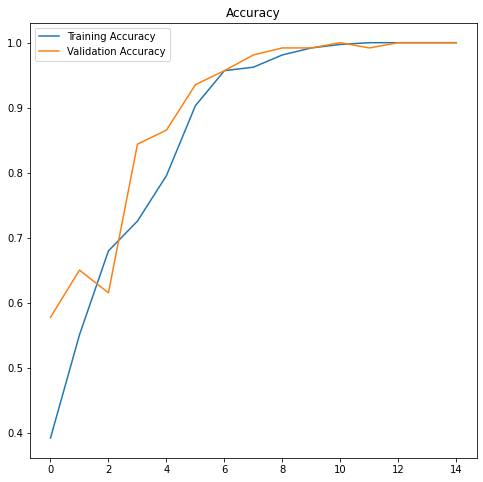

In [32]:
## Plotting Score & Loss Curve

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


## Plotting Accuracy Score
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
#plt.subplot(1,2,1)
plt.plot(range(15),acc,label='Training Accuracy')
plt.plot(range(15),val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Accuracy')

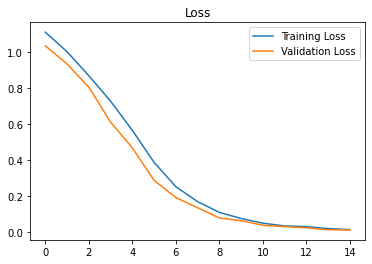

In [34]:
## Plotting Loss

#plt.subplot(1,2,2)
plt.plot(range(15),loss,label='Training Loss')
plt.plot(range(15),val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Loss')
plt.show()

In [ ]:
## Prediction
pred=model.predict(x=test,steps=len(test),verbose=1)
pred

###################################################

In [ ]:
## 
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

For those running this `Colab` on `Safari` broswer can upload the images(s) manually. Follow the instructions, uncomment the code block below and run it.

Instructions on how to upload image(s) manually in a Colab:

1. Select the `folder` icon on the left `menu bar`.
2. Click on the `folder with an arrow pointing upwards` named `..`
3. Click on the `folder` named `tmp`.
4. Inside of the `tmp` folder, `create a new folder` called `images`. You'll see the `New folder` option by clicking the `3 vertical dots` menu button next to the `tmp` folder.
5. Inside of the new `images` folder, upload an image(s) of your choice, preferably of either a horse or a human. Drag and drop the images(s) on top of the `images` folder.
6. Uncomment and run the code block below. 

In [ ]:
# import numpy as np
# from keras.preprocessing import image
# import os

# images = os.listdir("/tmp/images")

# print(images)

# for i in images:
#  print()
#  # predicting images
#  path = '/tmp/images/' + i
#  img = image.load_img(path, target_size=(150, 150))
#  x = image.img_to_array(img)
#  x = np.expand_dims(x, axis=0)

#  images = np.vstack([x])
#  classes = model.predict(images, batch_size=10)
#  print(classes[0])
#  if classes[0]>0.5:
#    print(i + " is a human")
#  else:
#    print(i + " is a horse")

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.